## EPS Example Notebook 

This notebook shows an example replicating previous the simple electric power system implemented in [IBFM](https://github.com/DesignEngrLab/IBFM) in the `eps example` directory, with some basic fault propagation and visualization.

In [1]:
import sys, os
sys.path.insert(1,os.path.join(".."))
from eps import EPS
import fmdtools.faultsim.propagate as propagate
import fmdtools.resultdisp as rd

This script provides some example I/O for using static models, using the EPS system implemented in eps.py as an example.

A graphical representaiton of this system is shown below:

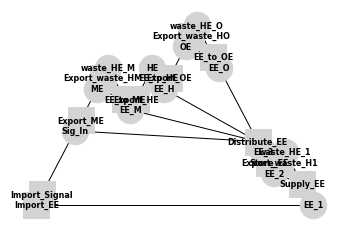

In [2]:
mdl= EPS()
fig, ax = rd.graph.show(mdl.bipartite, gtype='bipartite')

As with dynamic models, in static models we use ``fp.run_one_fault`` to see the effects of single faults. All setup is performed in the Model class definition

In [3]:
endresults,resgraph, mdlhist = propagate.one_fault(mdl, 'EE_to_ME', 'toohigh_torque')

In this case, however, the output in ``mdlhists`` will be a single-dimensional dictionary (not something we can plot very well)

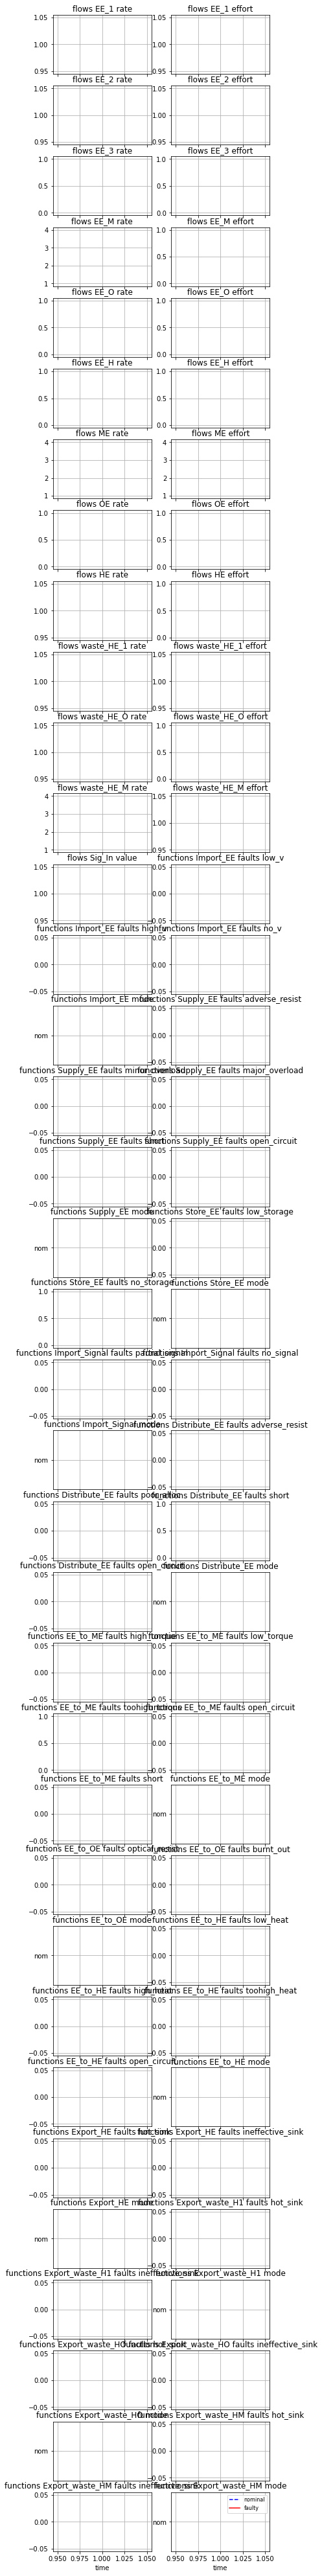

In [4]:
fig, ax = rd.plot.mdlhists(mdlhist)

As a result, it's better to look at the results graph for a visualization of what went wrong. In this case ``resgraph`` better represents the fault propagation of the system than in a dynamic model, since there is only one time-step to represent (rather than a set)

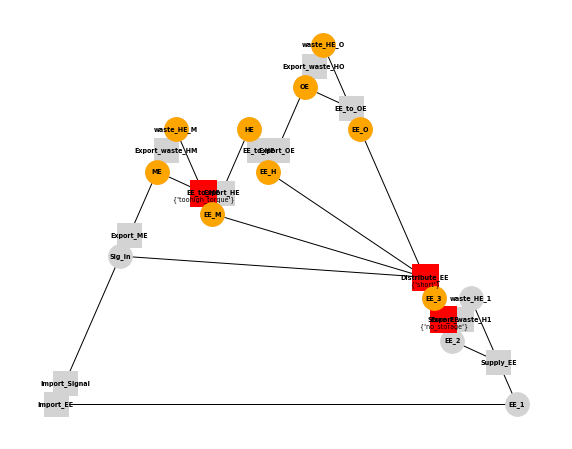

In [5]:
fig, ax = rd.graph.show(resgraph, scale=0.8, figsize=(10,8))

We can run the set of single-fault scenarios on this model using ``fmdtools.faultsim.propagate.single_faults``. For single-fault scenarios, one does not need to use a ``SampleApproach``, since all faults are injected at a single time-step.

In [6]:
endclasses, mdlhists = propagate.single_faults(mdl)

SCENARIOS COMPLETE: 100%|█████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 238.40it/s]


Using ``make_summarytable``, one can see the degradation effects of this fault on the flows:

In [7]:
reshists, diffs, summary = rd.process.hists(mdlhists)
sumtable = rd.tabulate.summary(summary)
sumtable

,degraded functions,degraded flows
"Import_EE low_v, t=1",[Import_EE],"[EE_1, EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, H..."
"Import_EE high_v, t=1","[Import_EE, Store_EE]","[EE_1, EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, H..."
"Import_EE no_v, t=1",[Import_EE],"[EE_1, EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, H..."
"Supply_EE adverse_resist, t=1",[Supply_EE],"[EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, HE, was..."
"Supply_EE minor_overload, t=1","[Supply_EE, Store_EE, Distribute_EE]","[EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, HE, was..."
"Supply_EE major_overload, t=1","[Supply_EE, Store_EE]","[EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, HE, was..."
"Supply_EE short, t=1","[Supply_EE, Store_EE, Distribute_EE]","[EE_1, EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, H..."
"Supply_EE open_circuit, t=1",[Supply_EE],"[EE_2, EE_3, EE_M, EE_O, EE_H, ME, OE, HE, was..."
"Store_EE low_storage, t=1",[Store_EE],[]
"Store_EE no_storage, t=1",[Store_EE],"[EE_3, EE_M, EE_O, EE_H, ME, OE, HE, waste_HE_..."


Given the value model in find_classification, we can finaly use this to make a simple fmea table:

In [8]:
rd.tabulate.simplefmea(endclasses)

,rate,cost,expected cost
"Import_EE low_v, t=1",1.000000e-05,700.0,306.6000
"Import_EE high_v, t=1",5.000000e-06,3350.0,733.6500
"Import_EE no_v, t=1",1.000000e-05,1550.0,678.9000
"Supply_EE adverse_resist, t=1",2.000000e-06,1650.0,144.5400
"Supply_EE minor_overload, t=1",1.000000e-05,5150.0,2255.7000
"Supply_EE major_overload, t=1",3.000000e-06,3650.0,479.6100
"Supply_EE short, t=1",1.000000e-07,5150.0,22.5570
"Supply_EE open_circuit, t=1",5.000000e-08,1450.0,3.1755
"Store_EE low_storage, t=1",5.000000e-06,2000.0,438.0000
"Store_EE no_storage, t=1",5.000000e-06,3250.0,711.7500
